In [1]:
# understanding and manipualting MorganFingerprints

In [2]:
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import DrawingOptions
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import Draw

import numpy as np
import matplotlib.pyplot as plt

DrawingOptions.atomLabelFontSize = 55
DrawingOptions.dotsPerAngstrom = 500
DrawingOptions.bondLineWidth = 3.0

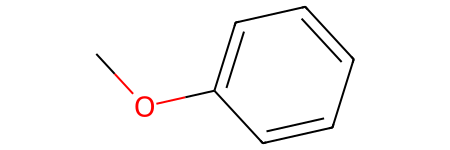

In [21]:
# get the molecular SMILES described:
smi = 'COc1ccccc1'
mol = Chem.MolFromSmiles(smi)
mol

In [22]:
# get associated MorganFingerprint of radius 2
fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2)
vect = np.array(fp)
vect

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
# get associated MorganFingerprint of radius 2 with bit information
bitInfo={}
fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, bitInfo=bitInfo)
# arr = np.zeros((1,))
#DataStructs.ConvertToNumpyArray(fp, arr)

In [24]:
# get list of indexes of all bits "on"
onbit = [bit for bit in bitInfo.keys()]
onbit

[322, 389, 562, 695, 781, 831, 841, 1057, 1088, 1199, 1380, 1536, 1750, 1873]

In [25]:
# view the atomic information of each bit "on"
bitInfo

{322: ((2, 1),),
 389: ((5, 2),),
 562: ((3, 2), (7, 2)),
 695: ((1, 0),),
 781: ((1, 2),),
 831: ((2, 2),),
 841: ((0, 1),),
 1057: ((0, 0),),
 1088: ((4, 1), (5, 1), (6, 1)),
 1199: ((4, 2), (6, 2)),
 1380: ((2, 0),),
 1536: ((1, 1),),
 1750: ((3, 1), (7, 1)),
 1873: ((3, 0), (4, 0), (5, 0), (6, 0), (7, 0))}

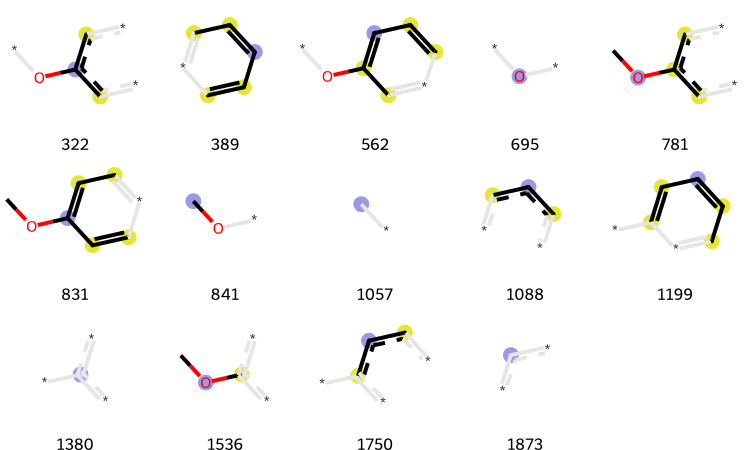

In [26]:
# draw the bit information for a more comprehensive representation of the information encoded

tpls = [(mol, x, bitInfo) for x in onbit]

# drawing parameters 
d3d = Chem.Draw.DrawingOptions()
d2d = Chem.Draw.rdMolDraw2D.MolDrawOptions()
d2d.bondLineWidth= 4
d2d.dotsPerAngstrom = 300.0
d2d.clearBackground = True
d2d.fixedBondLength = 1000
d2d.padding = 0
d2d.centreMoleculesBeforeDrawing=True
d2d.fixedScale=7.0

# making the figure
img = Draw.DrawMorganBits(tpls, 
                        legends = [str(x) for x in onbit],
                        drawOptions=d2d, molsPerRow=5,
                         useSVG=True)

filename = 'figures/subfigure_11_Morganbit.svg'
with open(filename, 'w') as f:
    f.write(img.data)
    
img